In [1]:
NAME = "" # put your full name here
COLLABORATORS = [] # list names of anyone you worked with on this homework.

# [ER-131] Homework 3: EDA Fire Incident Data
<br>

### Table of Contents
[Introduction](#intro)<br>
1 - [The IOU data](#data)<br>
2 - [Merging IOU and Weather Station Data](#merge)<br>
3 - [EDA](#eda)<br>
4 - [Exploring data through tables and visuals](#tables_plots)<br>
5 - [Summarizing data](#summarize)<br>

### Introduction <a id='intro'></a>

In this homework, you will investigate fire incident data from the three California Investor Owned Utilities (IOUs). The main goal for this assignment is to establish different ways to explore your data and its limitations, as well as ways to summarize and re-organize data.

We will accomplish this by utilizing exploratory data analysis (EDA) to analyze utility-reported data alongside weather data.

### Topics Covered 

* Work with different file types
* Merge dataframes and perform operations to add new columns
* View data through lens of structure, granularity, scope, temporality and faithfulness
* Perform basic data cleaning operations

### Dependencies

**Question 0:** Import the NumPy, Pandas, matplotlib, and Geopandas packages using their common pseudonyms. 

In [2]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
# Run this cell to import a few more packages.
import csv
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

from IPython.display import display, Latex, Markdown
pd.set_option('display.max_columns', 36)

----
## Section 1: The IOU Data<a id='data'></a>

In this notebook, you'll be working with data from the [California Public Utilities Commission](https://www.cpuc.ca.gov/fireincidentsdata/). The three California IOUs (PG&E, SCE, and SDGE) are required to report fire incidents to the CPUC, along with certain characteristics of the fire and the electrical system in the area.

<br>**Question 1.1:** Look through the `data` folder and then read the Shapefiles into the homework so we can easily work with the data. These files were retrieved from the CPUC website, and small adjustments were made in Excel to make them easily retrievable in the notebook. The first example (PG&E) has been done for you.

Take a look at the arguments that are passed to the `read_file` function. First, we specify the file location. We also set  `index_col` to `False`.  This forces numbered indices. As an alternative we could have passed a number to `index_col`; if we pass $n$ in, then Pandas uses the $n+1^{\text{st}}$ column of the csv as the index. 

In [4]:
pge = gpd.read_file('data/PGEfireincidents.shp',index_col=False)

In [5]:
pge.head()

,Utility Na,Fire Start,Fire Sta_1,Material a,Land Use a,Size,Suppressed,Suppressin,Facility I,Other Comp,Voltage (V,Equipment,Type,Was There,Outage Dat,Outage Tim,Suspected,Equipmen_1,Contact Fr,Facility C,Contributi,Notes,geometry
0,PG&E,6/10/14,15:14,Vegetation,Rural,< 0.25 Acres,Fire Agency,Red Bluff FD,101545144,None,"12,000",Conductor,Overhead,Yes,6/10/14,15:14,Contact From Object,N.A.,Other,Electric Facility,Human Error,Conveyor belt contact,POINT (-122.25333 40.20599)
1,PG&E,6/12/14,6:30,Vegetation,Rural,10 - 99 Acres,Fire Agency,Cal Fire et al,102230371,AT&T,"12,000",Conductor,Overhead,Yes,6/12/14,6:30,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,None,POINT (-122.74624 38.04375)
2,PG&E,6/13/14,9:19,Vegetation,Rural,< 0.25 Acres,Fire Agency,Hollister FD,101703071,AT&T,"21,000",Conductor,Overhead,Yes,6/13/14,9:19,Contact From Object,N.A.,Vehicle,Pole,Human Error,None,POINT (-121.388549 36.93348)
3,PG&E,6/14/14,8:47,Vegetation,Rural,< 3 meters,Unknown,None,100275552,AT&T,"12,000",Conductor,Overhead,Yes,6/14/14,8:47,Contact From Object,N.A.,Animal,Electric Facility,Unknown,None,POINT (-122.18077 37.419005)
4,PG&E,6/14/14,11:01,Vegetation,Rural,10 - 99 Acres,Fire Agency,CAL Fire,Pole 000/013,None,"70,000",Conductor,Overhead,Yes,6/14/14,11:01,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,None,POINT (-121.091918 37.130915)


Now load Southern California Edison ('SCEfireincidents') and San Diego Gas and Electric ('SDGEfireincidents') data

In [6]:
#YOUR ANSWER HERE
sce = gpd.read_file('data/SCEfireincidents.shp', index_col = False)
sdge = gpd.read_file('data/SDGEfireincidents.shp', index_col = False)

Geopandas truncates column names that exceed 10 characters. Run the script below to replace the column names with their original names. 

In [7]:
raw = pd.read_csv('data/PGEfireincidents.csv')
names = list(raw.columns) + ['geometry']
names.remove('Latitude')
names.remove('Longitude')

for df in [pge, sce, sdge]:
    df.columns = names

In [8]:
sce.head()

,Utility Name,Fire Start Date,Fire Start Time,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With Ignition,Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes,geometry
0,SCE,5/29/2014,18:00,Other,Urban,Less Than 0.25 Acres,Fire Agency,Santa Fe Springs,"14051 Marquadt, Santa Fe Springs 1398339E",None,66kV,Other,Overhead,No,None,None,Unknown,None,None,None,Unknown,None,POINT (-118.0386983 33.9036301)
1,SCE,6/5/2014,9:20,Other,Rural,Less Than 0.25 Acres,Fire Agency,LA County,700 East Ave. S. Palmdale 1103139E,None,12kV,Conductor,Overhead,No,None,None,Contact From Object,None,Other,Electric Facility,Unknown,None,POINT (-118.117789 34.555046)
2,SCE,6/8/2014,18:00,Other,Urban,Less Than 0.25 Acres,Fire Agency,Huntington Beach,"19391, 19381, 19371, Pitcairn, Huntington Beac...",None,12kV,Other,Overhead,No,None,None,Contact From Object,None,Balloons,Electric Facility,None,None,POINT (-117.9487188 33.6808854)
3,SCE,6/13/2014,13:00,Vegetation,Rural,1000 - 4999 Acres,Fire Agency,Cal Fire,West of Lake Isabella & South of Hwy 155,None,66kV,Other,Overhead,No,None,None,Unknown,None,None,None,Unknown,None,POINT (-118.511067 35.7151)
4,SCE,6/18/2014,15:00,Vegetation,Rural,0.26 - 9.99 Acres,Fire Agency,LA County,Location of Fire 726730E Calabasas,None,16kV,Conductor,Overhead,Yes,6/18/2014,Unknown,Unknown,None,None,None,Unknown,None,POINT (-118.676722 34.162642)


In [9]:
sdge.head()

,Utility Name,Fire Start Date,Fire Start Time,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With Ignition,Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes,geometry
0,SDG&E,1/1/2014,18:45,Vegetation,Urban,Less Than .25 Acres,Customer,None,P11112,None,12kV,Other,Overhead,Yes,1/1/2014,18:45,Equipment/Facility Failure,Splice/Clamp/Connector,None,None,Other,None,POINT (-117.078 33.1179)
1,SDG&E,3/5/2014,9:49,Vegetation,Rural,.26 - 9.99 Acres,Fire Agency,Cal Fire,P515262,None,12kV,Conductor,Overhead,Yes,3/12/2014,9:49,Equipment/Facility Failure,Splice/Clamp/Connector,None,None,None,None,POINT (-117.1142 33.2038)
2,SDG&E,4/15/2014,6:20,Vegetation,Urban,Less Than .25 Acres,Fire Agency,S.D.F.D.,Z180434,None,12kV,Conductor,Overhead,No,None,None,Equipment/Facility Failure,Guy/Span Wire,None,None,None,None,POINT (-117.046 32.6778)
3,SDG&E,4/17/2014,16:42,Vegetation,Urban,Less Than .25 Acres,Fire Agency,OFD,TL23010,None,230kV,Conductor,Overhead,No,None,None,Contact From Object,None,Vehicle,Electric Facility,Human Error,None,POINT (-117.338 33.2203)
4,SDG&E,4/27/2014,12:00,Vegetation,Rural,Less Than .25 Acres,Utility,None,"TL 6912, Z122445",none,69kV,Other,Overhead,No,None,None,Equipment/Facility Failure,Other,None,None,None,None,POINT (-117.347 32.2415)


**Question 1.2:** What type of geometry are the objects in the `pge`, `sce`, and `sdge` GeoDataFrames?

In [10]:
# scratch work here
print(type(pge.geometry[0]))
assert type(pge.geometry[0]) == type(sce.geometry[0])
assert type(pge.geometry[0]) == type(sdge.geometry[0])

<class 'shapely.geometry.point.Point'>


*YOUR ANSWER HERE*

*Points.*

Let's plot the three IOU datasets on the same map to get a sense of where the data lie.

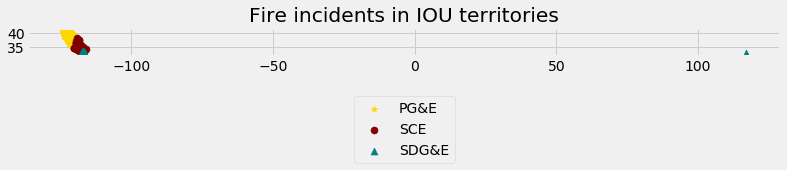

In [11]:
# Run this cell
fig, ax = plt.subplots(figsize = (12,8))
pge.plot(ax = ax, label = 'PG&E', color = 'gold', marker = '*', markersize = 50)
sce.plot(ax = ax, label = 'SCE', color = 'maroon', marker = 'o', markersize = 50)
sdge.plot(ax = ax, label = 'SDG&E', color = 'teal', marker = '^', markersize = 50)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -4))
plt.title('Fire incidents in IOU territories')
plt.show();

Uh oh! Looks like something is wrong with our data for SDG&E.

**Question 1.3:** Examine the graph carefully and describe a possible data error that is leading to the unexpected output of our map. 

*YOUR ANSWER HERE*

*It appears that the coordinates of one of the data points in the SDG&E data are incorrect. California is situated between approximately -124 and -116 degrees West, but one data point falls around 116 degrees.*

**Question 1.4:** The most extreme latitude and longitude points in California are approximately as follows: 
* North: 42.0095 
* East -114.1312 
* South: 32.5341
* West: -124.4096 
 

Fill in the ellipses below to identify any points in the `sdge` data that fall outside of California. Note: the pipe | symbol is the equivalent of an "or" statement. In other words, the `.loc` function in the code block below is filtering the `sdge` GeoDataFrame if *any* of the four specified criteria are true.

In [12]:
sdge.loc[(sdge.geometry.y > 42.0095) | # Fill in the ellipses to check that no points fall above the northernmost boundary, or...
         (sdge.geometry.x > -114.1312) | # ...to the right of the easternnmost boundary, or...
         (sdge.geometry.y < 32.5341) |  # ... below the southernmost boundary, or...
         (sdge.geometry.x < -124.4096)]   # ... to the left of the westernmost boundary.

,Utility Name,Fire Start Date,Fire Start Time,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With Ignition,Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes,geometry
4,SDG&E,4/27/2014,12:00,Vegetation,Rural,Less Than .25 Acres,Utility,None,"TL 6912, Z122445",none,69kV,Other,Overhead,No,None,None,Equipment/Facility Failure,Other,None,None,None,None,POINT (-117.347 32.2415)
20,SDG&E,7/22/2014,10:25,Vegetation,Rural,Less Than .25 Acres,Fire Agency,Cal Fire,P276288,AT&T,12kV,Conductor,Overhead,No,None,None,Contact From Object,None,Vehicle,Electric Facility,Outside Force,None,POINT (116.8455 32.7899)
50,SDG&E,8/23/2015,15:00,Vegetation,Rural,.26 - 9.99 Acres,Fire Agency,CAL FIRE,P415300,None,12kV,Conductor,Overhead,Yes,8/23/2015,15:00,Contact From Object,None,Vegetation,Electric Facility,Weather,None,POINT (-117.1521 32.27291)


**Question 1.5:** For the sake of expediency, `drop` the extraneous points identified in Question 1.4 from the `sdge` GeoDataFrame (an alternative could be to research each of these fires and manually correct the location). Make sure to specify the `labels`, `axis`, and `inplace` parameters correctly. You should not rename the dataframe.

In [13]:
#YOUR CODE HERE

sdge.drop(labels = [4,20,50], axis = 0, inplace = True)

In [14]:
assert len(sdge) == 89

Let's try our plot again.

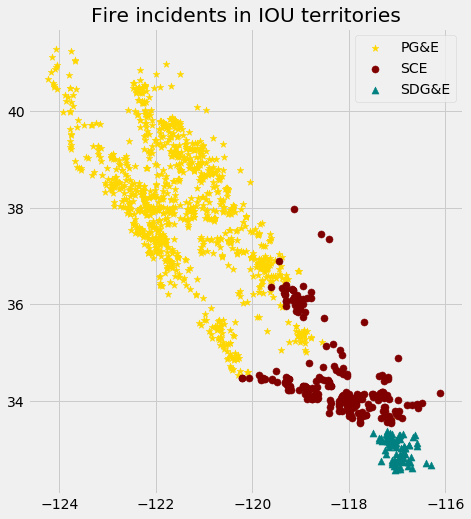

In [15]:
# Run this cell
fig, ax = plt.subplots(figsize = (12,8))
pge.plot(ax = ax, label = 'PG&E', color = 'gold', marker = '*', markersize = 50)
sce.plot(ax = ax, label = 'SCE', color = 'maroon', marker = 'o', markersize = 50)
sdge.plot(ax = ax, label = 'SDG&E', color = 'teal', marker = '^', markersize = 50)
plt.title('Fire incidents in IOU territories')
plt.legend()
plt.show()

Much better!

## Section 2: Merging IOU and Weather Station Data<a id='merge'></a>

We'll also be working with weather data from the National Oceanic and Atmospheric Administration (NOAA). [Daily Summary Data](https://www.ncdc.noaa.gov/cdo-web/datasets#GHCND) were obtained for one land-based weather station per IOU service area from January 2014 to December 2016. 

**Question 2.1**: Load the file noaa_dailysummary.csv into a Pandas dataframe.

In [16]:
# YOUR CODE HERE
weather = pd.read_csv("data/noaa_dailysummary.csv")

In [17]:
weather.head()

,STATION,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN
0,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",1/1/2014,3.36,0.0,56.0,68,47
1,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",1/2/2014,2.68,0.0,58.0,71,47
2,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",1/3/2014,2.01,0.0,58.0,66,46
3,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",1/4/2014,1.79,0.0,60.0,66,56
4,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",1/5/2014,3.13,0.0,60.0,74,50


We're going to be merging fire incident data between each IOU and a land-based weather station in that IOU's service area. There are three weather stations in the dataframe `weather`, as shown in the output below. 'SAN DIEGO INTERNATIONAL AIRPORT, CA US' is in SDG&E's service area, 'SAN FRANCISCO DOWNTOWN, CA US' is in PG&E's service area, and 'RIVERSIDE MUNICIPAL AIRPORT, CA US' is in SCE's service area. <br>

In [18]:
weather["NAME"].unique() # look at weather station values

array(['SAN DIEGO INTERNATIONAL AIRPORT, CA US',
       'SAN FRANCISCO DOWNTOWN, CA US',
       'RIVERSIDE MUNICIPAL AIRPORT, CA US'], dtype=object)

**Question 2.2** Since we're going to use the `merge()` function, we want the fields (i.e., columns) that we merge on to have the same name. Both the IOU and weather station data have a field for date, but these columns have different names between the two datasets. Rename the "DATE" column in `weather` to match the "Fire Start Date" column in the IOU dataframes using the function `.rename()`. Set the `inplace` parameter so that you do not have to reassign the dataset to a new name.

In [19]:
# YOUR CODE HERE
weather.rename(columns = {"DATE":"Fire Start Date"}, inplace = True) # rename data column

Finally, run the code below to convert the data type of all the date columns to `datetime`.<br>

In [20]:
#Run this cell
for df in [pge, sce, sdge, weather]: # change date data type to datetime
    df["Fire Start Date"] = pd.to_datetime(df["Fire Start Date"], errors = "coerce")

**Question 2.3**: Create three new dataframes - `weather_sdge`, `weather_pge`, and `weather_sce` - that correspond to just the weather data in that IOU's service area. (Hint: the `str_contains` method might come in handy.)

In [21]:
# YOUR CODE HERE
weather_sdge = weather[weather["NAME"].str.contains("SAN DIEGO")]
weather_pge = weather[weather["NAME"].str.contains("SAN FRANCISCO")]
weather_sce = weather[weather["NAME"].str.contains("RIVERSIDE")]

In [22]:
weather_sdge.head()

,STATION,NAME,Fire Start Date,AWND,PRCP,TAVG,TMAX,TMIN
0,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",2014-01-01,3.36,0.0,56.0,68,47
1,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",2014-01-02,2.68,0.0,58.0,71,47
2,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",2014-01-03,2.01,0.0,58.0,66,46
3,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",2014-01-04,1.79,0.0,60.0,66,56
4,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",2014-01-05,3.13,0.0,60.0,74,50


In [23]:
weather_pge.head()

,STATION,NAME,Fire Start Date,AWND,PRCP,TAVG,TMAX,TMIN
1096,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",2014-01-01,NaN,0.0,NaN,63,44
1097,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",2014-01-02,NaN,0.0,NaN,63,48
1098,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",2014-01-03,NaN,0.0,NaN,64,49
1099,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",2014-01-04,NaN,0.0,NaN,66,46
1100,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",2014-01-05,NaN,0.0,NaN,66,48


In [24]:
weather_sce.head()

,STATION,NAME,Fire Start Date,AWND,PRCP,TAVG,TMAX,TMIN
2192,USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",2014-01-01,3.13,0.0,NaN,77,39
2193,USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",2014-01-02,3.58,0.0,NaN,82,49
2194,USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",2014-01-03,2.91,0.0,NaN,76,47
2195,USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",2014-01-04,1.34,0.0,NaN,71,45
2196,USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",2014-01-05,6.93,0.0,NaN,75,44


**Question 2.4**: Merge each utility's fire incident and weather data and save the merged dataframes as `sdge_fireweather`, `pge_fireweather`, and `sce_fireweather`. The data should be merged on the date fields. 

In [25]:
# YOUR CODE HERE
pge_fireweather = pge.merge(weather_pge, on = "Fire Start Date")
sce_fireweather = sce.merge(weather_sce, on = "Fire Start Date")
sdge_fireweather = sdge.merge(weather_sdge, on = "Fire Start Date")

**Question 2.5:** What type of merge did you use in Question 1.5b (inner, outer, left, right)? Why did you choose this type?

*YOUR ANSWER HERE*

*If your goal is to analyze the weather conditions on days when fires started, an "inner" merge would guarantee you only end up with the dates that are common to both the IOU and weather station data. Since the IOU data have a more limited number of date records than do the weather data, you could also use a left or right merge depending on how you set up the function. An outer merge would retain all the IOU and all the weather records even if they didn't overlap.*

In [26]:
pge_fireweather.head()

,Utility Name,Fire Start Date,Fire Start Time,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With Ignition,Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes,geometry,STATION,NAME,AWND,PRCP,TAVG,TMAX,TMIN
0,PG&E,2014-06-10,15:14,Vegetation,Rural,< 0.25 Acres,Fire Agency,Red Bluff FD,101545144,None,"12,000",Conductor,Overhead,Yes,6/10/14,15:14,Contact From Object,N.A.,Other,Electric Facility,Human Error,Conveyor belt contact,POINT (-122.25333 40.20599),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,64,55
1,PG&E,2014-06-12,6:30,Vegetation,Rural,10 - 99 Acres,Fire Agency,Cal Fire et al,102230371,AT&T,"12,000",Conductor,Overhead,Yes,6/12/14,6:30,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,None,POINT (-122.74624 38.04375),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,62,52
2,PG&E,2014-06-13,9:19,Vegetation,Rural,< 0.25 Acres,Fire Agency,Hollister FD,101703071,AT&T,"21,000",Conductor,Overhead,Yes,6/13/14,9:19,Contact From Object,N.A.,Vehicle,Pole,Human Error,None,POINT (-121.388549 36.93348),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,70,54
3,PG&E,2014-06-14,8:47,Vegetation,Rural,< 3 meters,Unknown,None,100275552,AT&T,"12,000",Conductor,Overhead,Yes,6/14/14,8:47,Contact From Object,N.A.,Animal,Electric Facility,Unknown,None,POINT (-122.18077 37.419005),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,75,54
4,PG&E,2014-06-14,11:01,Vegetation,Rural,10 - 99 Acres,Fire Agency,CAL Fire,Pole 000/013,None,"70,000",Conductor,Overhead,Yes,6/14/14,11:01,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,None,POINT (-121.091918 37.130915),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,75,54


In [27]:
sce_fireweather.head()

,Utility Name,Fire Start Date,Fire Start Time,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With Ignition,Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes,geometry,STATION,NAME,AWND,PRCP,TAVG,TMAX,TMIN
0,SCE,2014-05-29,18:00,Other,Urban,Less Than 0.25 Acres,Fire Agency,Santa Fe Springs,"14051 Marquadt, Santa Fe Springs 1398339E",None,66kV,Other,Overhead,No,None,None,Unknown,None,None,None,Unknown,None,POINT (-118.0386983 33.9036301),USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",4.92,0.0,NaN,87,60
1,SCE,2014-06-05,9:20,Other,Rural,Less Than 0.25 Acres,Fire Agency,LA County,700 East Ave. S. Palmdale 1103139E,None,12kV,Conductor,Overhead,No,None,None,Contact From Object,None,Other,Electric Facility,Unknown,None,POINT (-118.117789 34.555046),USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",4.25,0.0,NaN,91,58
2,SCE,2014-06-08,18:00,Other,Urban,Less Than 0.25 Acres,Fire Agency,Huntington Beach,"19391, 19381, 19371, Pitcairn, Huntington Beac...",None,12kV,Other,Overhead,No,None,None,Contact From Object,None,Balloons,Electric Facility,None,None,POINT (-117.9487188 33.6808854),USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",4.47,0.0,NaN,91,59
3,SCE,2014-06-13,13:00,Vegetation,Rural,1000 - 4999 Acres,Fire Agency,Cal Fire,West of Lake Isabella & South of Hwy 155,None,66kV,Other,Overhead,No,None,None,Unknown,None,None,None,Unknown,None,POINT (-118.511067 35.7151),USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",5.82,0.0,NaN,86,58
4,SCE,2014-06-18,15:00,Vegetation,Rural,0.26 - 9.99 Acres,Fire Agency,LA County,Location of Fire 726730E Calabasas,None,16kV,Conductor,Overhead,Yes,6/18/2014,Unknown,Unknown,None,None,None,Unknown,None,POINT (-118.676722 34.162642),USW00003171,"RIVERSIDE MUNICIPAL AIRPORT, CA US",4.70,0.0,NaN,85,57


In [28]:
sdge_fireweather.head()

,Utility Name,Fire Start Date,Fire Start Time,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With Ignition,Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes,geometry,STATION,NAME,AWND,PRCP,TAVG,TMAX,TMIN
0,SDG&E,2014-01-01,18:45,Vegetation,Urban,Less Than .25 Acres,Customer,None,P11112,None,12kV,Other,Overhead,Yes,1/1/2014,18:45,Equipment/Facility Failure,Splice/Clamp/Connector,None,None,Other,None,POINT (-117.078 33.1179),USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",3.36,0.0,56.0,68,47
1,SDG&E,2014-03-05,9:49,Vegetation,Rural,.26 - 9.99 Acres,Fire Agency,Cal Fire,P515262,None,12kV,Conductor,Overhead,Yes,3/12/2014,9:49,Equipment/Facility Failure,Splice/Clamp/Connector,None,None,None,None,POINT (-117.1142 33.2038),USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",5.14,0.0,61.0,68,55
2,SDG&E,2014-04-15,6:20,Vegetation,Urban,Less Than .25 Acres,Fire Agency,S.D.F.D.,Z180434,None,12kV,Conductor,Overhead,No,None,None,Equipment/Facility Failure,Guy/Span Wire,None,None,None,None,POINT (-117.046 32.6778),USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",5.82,0.0,63.0,69,59
3,SDG&E,2014-04-17,16:42,Vegetation,Urban,Less Than .25 Acres,Fire Agency,OFD,TL23010,None,230kV,Conductor,Overhead,No,None,None,Contact From Object,None,Vehicle,Electric Facility,Human Error,None,POINT (-117.338 33.2203),USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",7.38,0.0,62.0,65,60
4,SDG&E,2014-04-28,13:30,Vegetation,Rural,Less Than .25 Acres,Fire Agency,CALFIRE,"Circuit 214, P215546",none,12kV,Conductor,Overhead,Yes,4/28/2014,13:30,Equipment/Facility Failure,Splice/Clamp/Connector,None,None,None,None,POINT (-116.948 33.2926),USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",4.92,0.0,64.0,71,57


**Question 2.6:** Compare the number of records in the merged dataframes to the original pge, sce, and sdge dataframes. Did you lose any records when you performed the merge? Why or why not?

In [29]:
#scratch work here
print(sce.shape)
print(sce_fireweather.shape)
print(sdge.shape)
print(sdge_fireweather.shape)
print(pge.shape)
print(pge_fireweather.shape)
sdge[sdge['Fire Start Date'].isnull()]

(242, 23)
(242, 30)
(89, 23)
(88, 30)
(1051, 23)
(1051, 30)


,Utility Name,Fire Start Date,Fire Start Time,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With Ignition,Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes,geometry
68,SDG&E,NaT,0:00,Vegetation,Rural,Less Than .25 Acres,Utility,None,P40825,None,12kV,Conductor,Overhead,Yes,2/18/2016,6:00,Equipment/Facility Failure,Conductor,None,None,None,None,POINT (-116.397 32.7063)


*YOUR ANSWER HERE*

*An "inner" merge would have eliminated one record from the SDGE dataframe. This is because there was an imperfect overlap between the dates in the SDGE fire data and the weather station data. In this case, one of the fire records has a null date.*

Before combining data from all three IOUs, we'll run the following `assert` statements to make sure that the column names are the same across the three dataframes.

*Note*: because the reporting is standardized for these IOUs, and because of some Excel cleaning that was done beforehand, the column names should match up. But if you're working with a dataset where column names need to be changed, you can use the [`rename` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) or a value assigment (e.g., `sdge_fireweather.columns = sce_fireweather.columns` would set the columns of `sdge_fireweather` to be the same as those in `sce_fireweather`, as long as you were certain that the columns represented the same values).

In [30]:
assert all(pge_fireweather.columns == sce_fireweather.columns)
assert all(sce_fireweather.columns == sdge_fireweather.columns)

Now, we can use [`concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat) to combine all three dataframes into one, called `alliou`. Run the cell below to combine the three IOU dataframes. We want our new dataframe `alliou` to renumber the indices (otherwise we'd have three rows with row index = 0, three rows with row index = 1, etc.). Check the [`concat()` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat) and make sure that we've set the appropriate argument to achieve this.

In [31]:
alliou = pd.concat([pge_fireweather,sce_fireweather,sdge_fireweather], ignore_index = True)

In [32]:
alliou.head()

,Utility Name,Fire Start Date,Fire Start Time,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With Ignition,Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes,geometry,STATION,NAME,AWND,PRCP,TAVG,TMAX,TMIN
0,PG&E,2014-06-10,15:14,Vegetation,Rural,< 0.25 Acres,Fire Agency,Red Bluff FD,101545144,None,"12,000",Conductor,Overhead,Yes,6/10/14,15:14,Contact From Object,N.A.,Other,Electric Facility,Human Error,Conveyor belt contact,POINT (-122.25333 40.20599),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,64,55
1,PG&E,2014-06-12,6:30,Vegetation,Rural,10 - 99 Acres,Fire Agency,Cal Fire et al,102230371,AT&T,"12,000",Conductor,Overhead,Yes,6/12/14,6:30,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,None,POINT (-122.74624 38.04375),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,62,52
2,PG&E,2014-06-13,9:19,Vegetation,Rural,< 0.25 Acres,Fire Agency,Hollister FD,101703071,AT&T,"21,000",Conductor,Overhead,Yes,6/13/14,9:19,Contact From Object,N.A.,Vehicle,Pole,Human Error,None,POINT (-121.388549 36.93348),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,70,54
3,PG&E,2014-06-14,8:47,Vegetation,Rural,< 3 meters,Unknown,None,100275552,AT&T,"12,000",Conductor,Overhead,Yes,6/14/14,8:47,Contact From Object,N.A.,Animal,Electric Facility,Unknown,None,POINT (-122.18077 37.419005),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,75,54
4,PG&E,2014-06-14,11:01,Vegetation,Rural,10 - 99 Acres,Fire Agency,CAL Fire,Pole 000/013,None,"70,000",Conductor,Overhead,Yes,6/14/14,11:01,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,None,POINT (-121.091918 37.130915),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,75,54


In [33]:
assert alliou.shape[0] > 1000
assert all(iou in alliou["Utility Name"].unique() for iou in ["PG&E", "SCE", "SDG&E"])

## Section 3: EDA<a id='eda'></a>

**Question 3.1:** 
Analyze the `alliou` table and see what data types are within the table. 
<br>What is the:
1. structure of the data?<br>
2. granularity of the data?<br>
3. scope of the data?<br>
4. temporality of the data?<br>
5. faithfulness of the data?<br>

Some questions to ask yourself:
* Structure - What was the format or file type of the imported data? Are there are any differences in data types between the individual IOU dataframes, the weather dataframe, and the combined dataframe?
* Granularity - What does each row of data represent? Do any of the fields represent aggregated data (data that is reduced or summarized in some way)? What's the resolution in time (eg. hourly, monthly) of the data?
* Scope - You can think of scope in different dimensions, but geographic scope and temporal scope is one place to start.
* Temporality - What do the dates and times represent?
* Faithfulness - Where do the data come from? Is there any reason to question it? Where do you find null values? How have the manipulations we have conducted in this notebook revealed (and impacted) faithfulness?

Please make a couple observations for each category (structure, granularity, etc). The [NOAA's Daily Summary Documentation](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf) might be a helfpul resource.

*YOUR ANSWER HERE*

*We won't include a detailed answer here, but two (accurate and relevant) observations for each category should give you full points. Answers should refer to both IOU data and weather data. Ch 5 of the Data 100 textbook is a good reference here.*

**Question 3.2**: To get a basic estimate of weather conditions on the day of the fire incident, we took daily summaries from one weather station in the service area of each IOU. This approach isn't particularly granular - the IOU datasets provide more detail both in terms of geography and time than the weather data that we are using. Let's say you wanted to refine this approach to more effectively uncover the weather conditions in the location and at the time of the fire incident. In a few sentences, qualitatively describe an alternative approach. <br>

You don't have to specify any code or functions, but you should reference which columns you would use (either in the IOU or weather datasets) and which datasets you would use - you can take a look at [available NOAA data here](https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets).

*YOUR ANSWER HERE*

*Many answers are possible, but students should talk about how they would match between data sets both in space and in time (eg. using the NOAA's hourly data and getting data from multiple land-based stations and matching on the closest latitude and longitude would be one approach).*

**Question 3.3:** What are the unique `Size` categories in the `alliou` table? Are there any redundancies in how the fire sizes are bucketed?

In [34]:
size_unique = alliou['Size'].unique()
size_unique

array(['< 0.25 Acres', '10 - 99 Acres', '< 3 meters', '.26 - 9.99 Acres',
       'Structure Only', '1000 - 4999 Acres', '300 - 999 Acres',
       '100 - 299 Acres', 'Less Than 0.25 Acres', '0.26 - 9.99 Acres',
       'Less Than .25 Acres', 'Greater than 5000 Acr'], dtype=object)

*YOUR ANSWER HERE*

*The unique `Size` categories are shown above, saved as array `size_unique`. There are redundancies in how the fire sizes were bucketed/entered. For example, '< 0.25 Acres' and 'Less Than 0.25 Acres' and 'Less Than .25 Acres' all represent the same value.*

----
## Section 4: Exploring data through tables and visuals<a id='tables_plots'></a>

In this section, we'll do some data cleaning with the objective of exploring the fire incident data.


**Question 4.1**: Use `pd.value_counts()` to get the number of reported fire incidents by utility. What do you notice about the relative number of reports by utility? What are some factors that could explain the differences in number of reports, particularly between PG&E and SCE?

In [35]:
# YOUR CODE HERE

pd.value_counts(alliou['Utility Name'])

PG&E     1051
SCE       242
SDG&E      88
Name: Utility Name, dtype: int64

*YOUR ANSWER HERE*

*PG&E consistently has much more incidents than SCE or SDG&E. SDG&E has a smaller service area, but PG&E and SCE have comparable service areas. Some of the factors that influence the high number of incidents that PG&E have might be a higher amount of vegetation in their service area or a higher number of overhead lines. (full marks were given to answers that provided at least 2 valid reasons for PG&E's comparatively higher number incidents)*

**Question 4.2:** Create a column called `Size_cleaned` that contains cleaned values from the `Size` column of the `alliou` dataframe, renamed to address any redundancies. The resulting column should have 9 unique values.

In [36]:
# copy column and rename so we retain the original column. The uncleaned column can be deleted later if you'd like - 
# but this way avoid any irreversible edits
alliou["Size_clean"] = alliou["Size"]

# YOUR CODE HERE to clean size column
alliou.loc[alliou["Size_clean"] == "Less Than 0.25 Acres", "Size_clean"] = "< 0.25 Acres"
alliou.loc[alliou["Size_clean"] == "Less Than .25 Acres", "Size_clean"] = "< 0.25 Acres"
alliou.loc[alliou["Size_clean"] == ".26 - 9.99 Acres", "Size_clean"] = "0.26 - 9.99 Acres"

alliou["Size_clean"].unique()

array(['< 0.25 Acres', '10 - 99 Acres', '< 3 meters', '0.26 - 9.99 Acres',
       'Structure Only', '1000 - 4999 Acres', '300 - 999 Acres',
       '100 - 299 Acres', 'Greater than 5000 Acr'], dtype=object)

In [37]:
assert len(alliou["Size_clean"].unique()) == 9

**Question 4.3:** Create a bar plot of how often each fire size category appears in the `alliou` dataframe. Use the function `pd.value_counts()` and the method `.plot` on the data frame. Give your plot a title and a y-axis label. Which fire sizes come up the most frequently in the dataset?

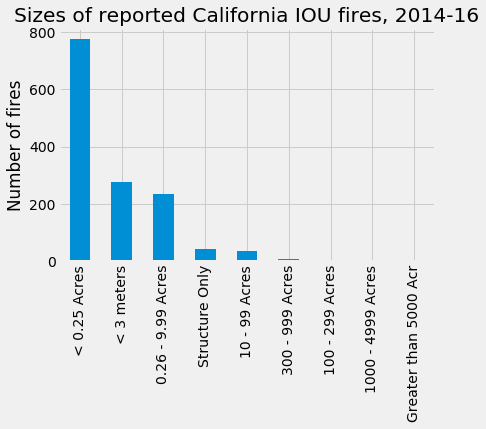

In [38]:
pd.value_counts(alliou["Size_clean"]).plot.bar() # YOUR CODE HERE
plt.title("Sizes of reported California IOU fires, 2014-16")
plt.ylabel('Number of fires');

*YOUR OBSERVATIONS HERE*

*The fires skew to the smaller sizes, with < 0.25 Acres representing over half of the dataset.*

Let's use the Pandas datetime functionality to add a column to the `alliou` called `day_of_year`. 

In [39]:
# Run this cell
alliou['day_of_year'] = alliou['Fire Start Date'].dt.dayofyear
alliou.head()

,Utility Name,Fire Start Date,Fire Start Time,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With Ignition,Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes,geometry,STATION,NAME,AWND,PRCP,TAVG,TMAX,TMIN,Size_clean,day_of_year
0,PG&E,2014-06-10,15:14,Vegetation,Rural,< 0.25 Acres,Fire Agency,Red Bluff FD,101545144,None,"12,000",Conductor,Overhead,Yes,6/10/14,15:14,Contact From Object,N.A.,Other,Electric Facility,Human Error,Conveyor belt contact,POINT (-122.25333 40.20599),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,64,55,< 0.25 Acres,161
1,PG&E,2014-06-12,6:30,Vegetation,Rural,10 - 99 Acres,Fire Agency,Cal Fire et al,102230371,AT&T,"12,000",Conductor,Overhead,Yes,6/12/14,6:30,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,None,POINT (-122.74624 38.04375),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,62,52,10 - 99 Acres,163
2,PG&E,2014-06-13,9:19,Vegetation,Rural,< 0.25 Acres,Fire Agency,Hollister FD,101703071,AT&T,"21,000",Conductor,Overhead,Yes,6/13/14,9:19,Contact From Object,N.A.,Vehicle,Pole,Human Error,None,POINT (-121.388549 36.93348),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,70,54,< 0.25 Acres,164
3,PG&E,2014-06-14,8:47,Vegetation,Rural,< 3 meters,Unknown,None,100275552,AT&T,"12,000",Conductor,Overhead,Yes,6/14/14,8:47,Contact From Object,N.A.,Animal,Electric Facility,Unknown,None,POINT (-122.18077 37.419005),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,75,54,< 3 meters,165
4,PG&E,2014-06-14,11:01,Vegetation,Rural,10 - 99 Acres,Fire Agency,CAL Fire,Pole 000/013,None,"70,000",Conductor,Overhead,Yes,6/14/14,11:01,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,None,POINT (-121.091918 37.130915),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,75,54,10 - 99 Acres,165


**Question 4.4:** Plot a histogram (using `plt.hist()`) of the `day_of_year` column. Set the number of `bins` to a meaninful value. Title and label your graph. What might you infer about the seasonality of fire ignitions across all IOUs?

''

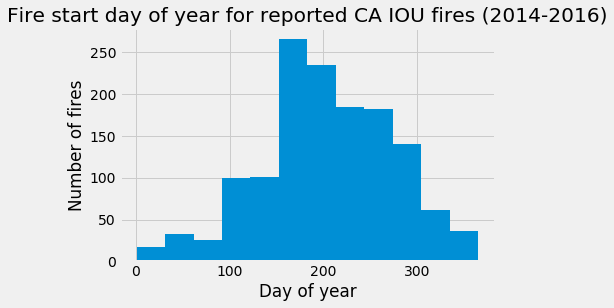

In [40]:
plt.hist(alliou['day_of_year'], bins =12)
plt.title("Fire start day of year for reported CA IOU fires (2014-2016)")
plt.xlabel('Day of year')
plt.ylabel('Number of fires')
;

*YOUR OBSERVATIONS HERE*

*It appears the fire season occurs during the late summer/early fall, with a consistent spike in incidents between May and September each year.*

**Question 4.5**: Examine the "Was There an Outage" column. Perform any necessary data cleaning operations, then use `pd.pivot_table` to create a table showing the number of incidents in each service territory that led to an outage. Your table should have two rows ("no" and "yes") indicating whether there was an outage, and three columns ("PG&E", "SCE", and "SDG&E") representing the three utilities. (Hint: to return a table with only three columns, you'll need to specify a column for the `values` parameter in the `pivot_table`.)

In [41]:
# YOUR CODE HERE
alliou['Was There an Outage'].unique()
alliou["Was There an Outage"] = alliou["Was There an Outage"].str.lower()
pd.pivot_table(alliou, values= 'Fire Start Date', index = 'Was There an Outage', columns = 'Utility Name', aggfunc='count' )

Utility Name,PG&E,SCE,SDG&E
Was There an Outage,,,
no,170,55,23
yes,881,187,63


<br>

----

## Section 5. Summarizing data<a id='summarize'></a>

One of the CPUC's goals when collecting this data is to identify operational and environmental trends related to fire incidents, with the objective of improving regulations and internal standards for utilities. In this section, you'll create a two new dataframes: one that summarizes fire incident data by material at origin, and another that summarizes weather data by year. In the process, you'll gain more experience with using `.groupby()` along with summarizing data that is non-numerical or doesn't lend itself as well to `.groupby()`. 
<br>

**Question 5.1:** Define a new dataframe, `alliou_matl`, that contains a single column with every unique value for "Material at Origin".

In [42]:
# YOUR CODE HERE
alliou_matl = pd.DataFrame()
alliou_matl["Material at Origin"] = alliou["Material at Origin"].unique()

In [43]:
alliou_matl

,Material at Origin
0,Vegetation
1,Other
2,Building


**Question 5.2:** The first set of values that we want to add to the dataframe is a count of the total number of fire incidents associated with each material type. Start by using `groupby().size()` to get a count of records for each material and save it to variable `counts`.

In [44]:
counts = alliou.groupby(["Material at Origin"]).size()

In [45]:
counts

Material at Origin
Building        33
Other           95
Vegetation    1253
dtype: int64

**Question 5.3**: Now we want to put the values from `counts` into a new column in dataframe `alliou_matl`. Do this below, making sure the right values from `counts` map to the correct material types. The resulting `alliou_matl` dataframe should have two columns, one for material and one for the count of fire incidents.<br>

In [46]:
# YOUR CODE HERE

# there are a lot of ways to do this - but since the material in counts is sorted alphabetically, 
# I'm going to sort the material names in the dataframe as well and then add the values
alliou_matl.sort_values(by = ["Material at Origin"], inplace = True)
alliou_matl["Fire incident count"] = counts.values

# NOTE: for this question and the next, answers that hard-coded the values into the dataframe 
# (eg. alliou_matl["Fire incident count"] = [33, 95, ...]) did not receive full marks

In [47]:
alliou_matl['Count of Fire Incidents'] = counts.values[::-1]

In [48]:
alliou_matl

,Material at Origin,Fire incident count,Count of Fire Incidents
2,Building,33,1253
1,Other,95,95
0,Vegetation,1253,33


**Question 5.4** Next, we want to find out what percentage of fire incidents involving each material are associated with outages. Add a column called "% Outage" to `alliou_matl` that provides this value. There are lots of ways to approach finding the percentage of fire incidents associated with outages per material type, but some helpful functions might be `groupby()` and `np.divide()`.

In [49]:
#YOUR CODE HERE

# get a count for number of outages per material type
outage_counts = alliou[alliou["Was There an Outage"] == "yes"].groupby(
    ["Material at Origin"]).size()

alliou_matl["% Outage"] = np.divide(outage_counts.values,alliou_matl["Fire incident count"])*100

alliou_matl

,Material at Origin,Fire incident count,Count of Fire Incidents,% Outage
2,Building,33,1253,84.848485
1,Other,95,95,82.105263
0,Vegetation,1253,33,81.803671


**Question 5.5**: You're working for the CPUC, and as you're exploring the fire incident data a colleague notices that almost 85% of fire incidents involving buildings are associated with outages. Your colleague concludes that the focus of the commission should be to work with utilities to inspect and retrofit facilities in the utility territory. Do you agree with your colleague? Why or why not? Is there any additional data that you would want to collect before deciding where to focus maintenance review efforts? <br>

*YOUR ANSWER HERE*

*There are many acceptable answers here, but students should answer the first two questions (if they agree and why/why not), discuss data limitations (potentially discussing the small sample size of building-related incidents or missing information like the number of affected customers in each outage), and discuss additional data collection.*

**Question 5.6** We'd also like to explore annual weather trends. To start off, create a new column in `alliou` called "Fire Start Year" that includes the year of the fire incident (the `.dt.year` method is helfpul here).

In [50]:
# YOUR CODE HERE

alliou["Fire Start Year"] = alliou["Fire Start Date"].dt.year

In [51]:
alliou.head()

,Utility Name,Fire Start Date,Fire Start Time,Material at Origin,Land Use at Origin,Size,Suppressed by,Suppressing Agency,Facility Identification,Other Companies,Voltage (Volts),Equipment Involved With Ignition,Type,Was There an Outage,Outage Date,Outage Time,Suspected Initiating Event,Equipment /Facility Failure,Contact From Object,Facility Contacted,Contributing Factor,Notes,geometry,STATION,NAME,AWND,PRCP,TAVG,TMAX,TMIN,Size_clean,day_of_year,Fire Start Year
0,PG&E,2014-06-10,15:14,Vegetation,Rural,< 0.25 Acres,Fire Agency,Red Bluff FD,101545144,None,"12,000",Conductor,Overhead,yes,6/10/14,15:14,Contact From Object,N.A.,Other,Electric Facility,Human Error,Conveyor belt contact,POINT (-122.25333 40.20599),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,64,55,< 0.25 Acres,161,2014
1,PG&E,2014-06-12,6:30,Vegetation,Rural,10 - 99 Acres,Fire Agency,Cal Fire et al,102230371,AT&T,"12,000",Conductor,Overhead,yes,6/12/14,6:30,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,None,POINT (-122.74624 38.04375),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,62,52,10 - 99 Acres,163,2014
2,PG&E,2014-06-13,9:19,Vegetation,Rural,< 0.25 Acres,Fire Agency,Hollister FD,101703071,AT&T,"21,000",Conductor,Overhead,yes,6/13/14,9:19,Contact From Object,N.A.,Vehicle,Pole,Human Error,None,POINT (-121.388549 36.93348),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,70,54,< 0.25 Acres,164,2014
3,PG&E,2014-06-14,8:47,Vegetation,Rural,< 3 meters,Unknown,None,100275552,AT&T,"12,000",Conductor,Overhead,yes,6/14/14,8:47,Contact From Object,N.A.,Animal,Electric Facility,Unknown,None,POINT (-122.18077 37.419005),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,75,54,< 3 meters,165,2014
4,PG&E,2014-06-14,11:01,Vegetation,Rural,10 - 99 Acres,Fire Agency,CAL Fire,Pole 000/013,None,"70,000",Conductor,Overhead,yes,6/14/14,11:01,Equipment/ Facility Failure,Crossarm,N.A.,N.A.,Unknown,None,POINT (-121.091918 37.130915),USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",NaN,0.0,NaN,75,54,10 - 99 Acres,165,2014


In [52]:
assert alliou.shape[1] == 33

**Question 5.7** Use `.groupby()` to create a dataframe called `alliou_year` that shows *average* weather data values for each year and utility. To do so, you'll need to give `.groupby()` two arguments in the form of a list.<br>

*Note*: You'll notice that the dataframe `alliou_year` will only provide grouped data for the weather-related variables (and the day_of_year column we added earlier), since none of the variables in the IOU dataset are stored as numbers (and so we can't calculate their mean).

In [53]:
alliou_year = alliou.groupby(["Fire Start Year", "Utility Name"]).mean()

In [54]:
alliou_year

AWND      PRCP       TAVG       TMAX  \
Fire Start Year Utility Name                                             
2014            PG&E               NaN  0.017126        NaN  68.511811   
                SCE           4.491026  0.064615        NaN  86.846154   
                SDG&E         5.831429  0.000000  70.500000  79.500000   
2015            PG&E               NaN  0.012713        NaN  69.045977   
                SCE           5.175514  0.016449        NaN  86.579439   
                SDG&E         5.216129  0.000000  69.612903  77.709677   
2016            PG&E               NaN  0.015442        NaN  66.654696   
                SCE           5.335729  0.023021        NaN  83.989583   
                SDG&E         5.746207  0.010000  67.965517  74.896552   

                                   TMIN  day_of_year  
Fire Start Year Utility Name                          
2014            PG&E          56.452756   234.043307  
                SCE           61.435897   251.846154  
                SDG&E         63.607143   171.321429  
2015            PG&E          55.995402   200.381609  
                SCE           59.373832   179.925234  
                SDG&E         64.000000   187.483871  
2016            PG&E          54.143646   201.414365  
                SCE           56.531250   180.729167  
                SDG&E         61.206897   168.379310

**Question 5.8** Define a function `temp_range()` that uses `alliou_year` and takes as input the year (as an integer) and the utility name (as a string) and returns the difference between the average maximum and average minimum value for that service area and year, rounded to two decimal places. Check out the [MultiIndex documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-indexing-with-hierarchical-index) for more information on how to use `.loc()` to access the values you want from `alliou_year`.

In [55]:
def temp_range(year, utility):
    """
    Calculate the difference between the average maximum and average minimum value for a given utility's land-based temperature in a certain year.
    
    Args:
        year, an integer (acceptable values are 2014, 2015, or 2016)
        utility, a string representing the utility (acceptable values are "PG&E", "SCE", and "SDG&E")
        
    Returns:
        The difference between average maximum and minimum value of the temperature, rounded to two decimal places (float)
    """
    
    # YOUR CODE HERE
    
    max_val = alliou_year.loc[(year, utility)]['TMAX']
    min_val = alliou_year.loc[(year, utility)]['TMIN']
    return round(max_val-min_val, 2)

In [56]:
print(temp_range(2014, "SCE"))
print(temp_range(2016, "PG&E"))

25.41
12.51


----

## Submission

Congrats, you're done with homework 3!

Before you submit, click **Kernel** --> **Restart & Clear Output**. Then, click **Cell** --> **Run All**. Then, go to the toolbar and click **File** -> **Download as** -> **.html** and submit the file **as both an .html and .ipynb file through bCourses**.

----

## Bibliography

- CPUC Fire Incident Data Collection: https://www.cpuc.ca.gov/fireincidentsdata/
- NOAA Daily Summary Documentation: https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf